In [1]:
import cupy as cp
import numpy as np
import pandas as pd
from types import SimpleNamespace
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1 import make_axes_locatable
from utils import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Times New Roman', 'size'   : 22}
matplotlib.rc('font', **font)
from matplotlib.ticker import FormatStrFormatter

In [2]:
n = 128  # object size in each dimension
ntheta = 128  # number of angles (rotations)
theta = np.linspace(0, np.pi, ntheta).astype('float32')  # projection angles

ndist = 4 # number of distances from the focal spot in holotomography
detector_pixelsize = 3e-6 # detector pixel size
energy = 33.35  # [keV] xray energy
wavelength = 1.2398419840550367e-09/energy  # [m] wave length

focusToDetectorDistance = 1.208  # focus to detector distance [m]
sx0 = -2.493e-3
z1 = np.array([1.5335e-3, 1.7065e-3, 2.3975e-3, 3.8320e-3])[:ndist]-sx0 # distances
z2 = focusToDetectorDistance-z1
distances = (z1*z2)/focusToDetectorDistance # adjusted distances
magnifications = focusToDetectorDistance/z1 # magnifications
voxelsize = detector_pixelsize/magnifications[0]*2048/n/2  # object voxel size

norm_magnifications = magnifications/magnifications[0] # normalized magnifications
distances = distances*norm_magnifications**2 # readjusted distances
npsi = int(np.ceil(n/norm_magnifications[-1]/8))*8  # reconstructed object size based on magnification and detector size


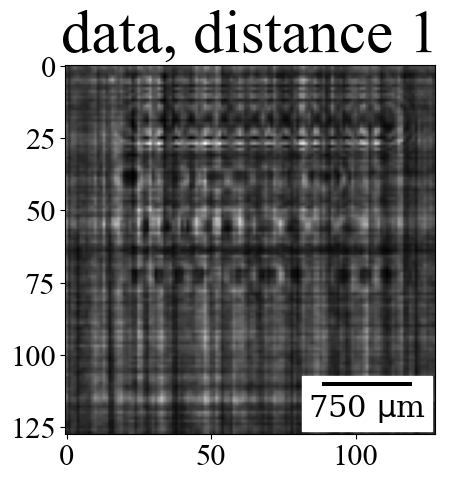

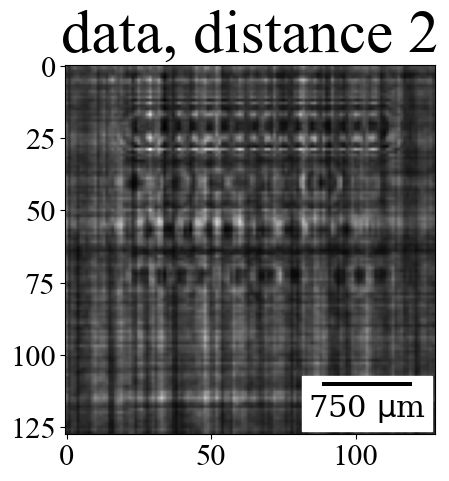

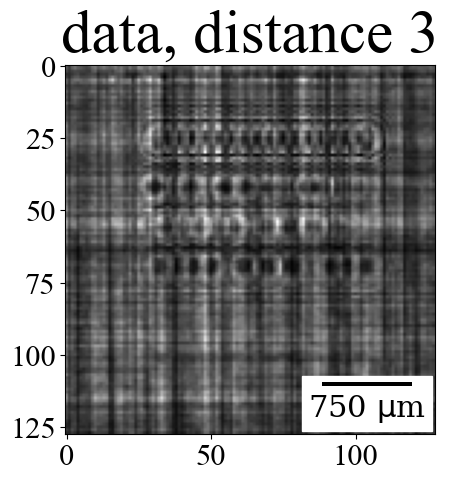

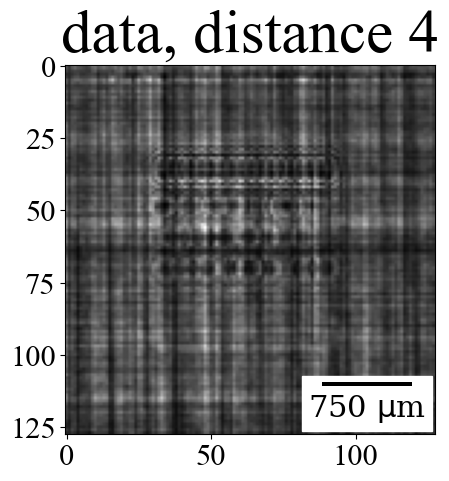

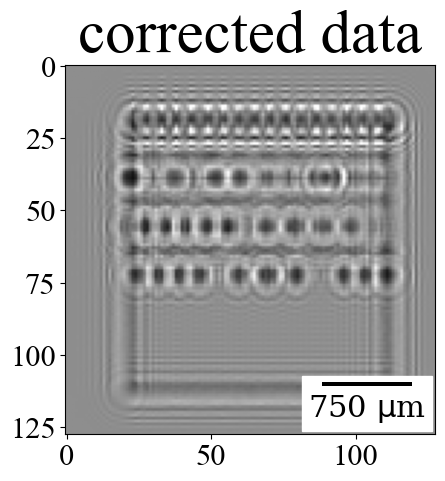

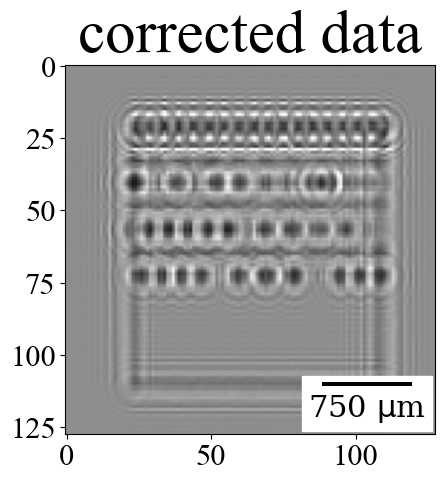

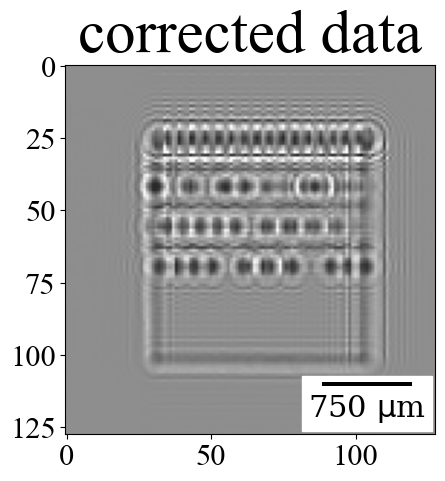

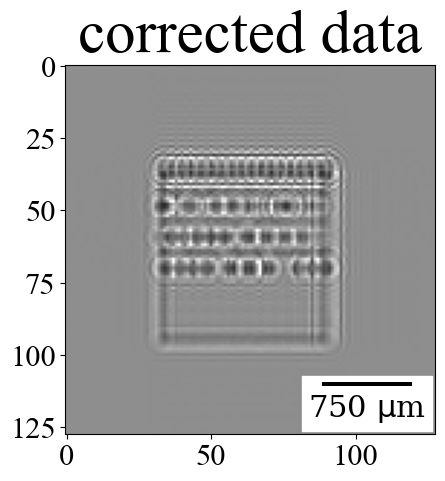

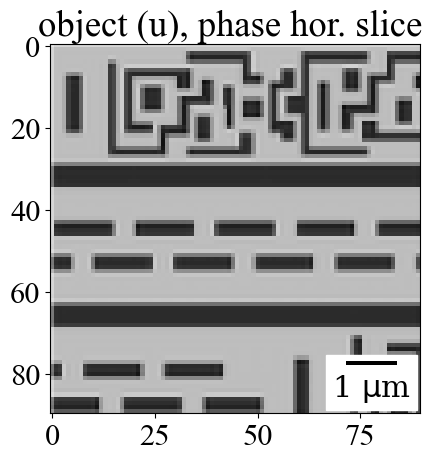

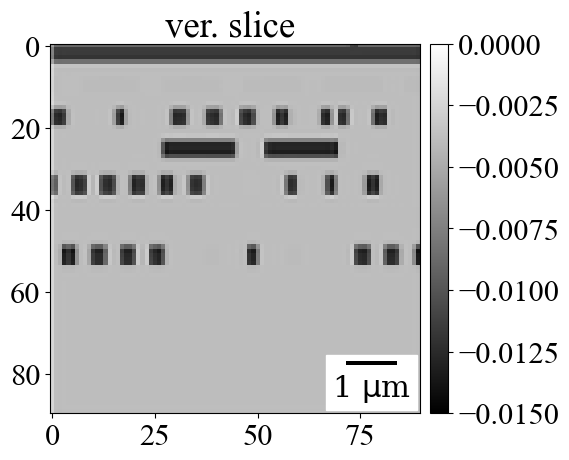

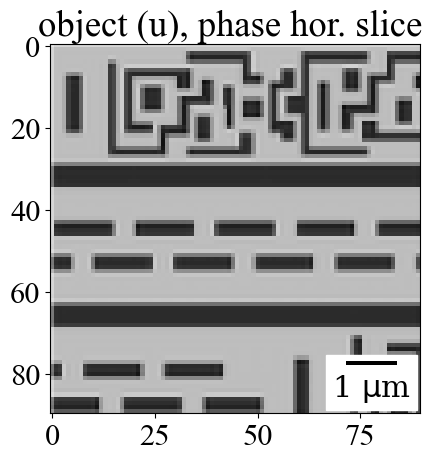

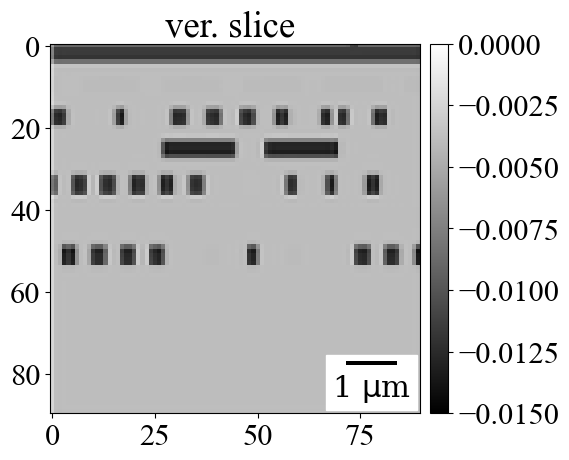

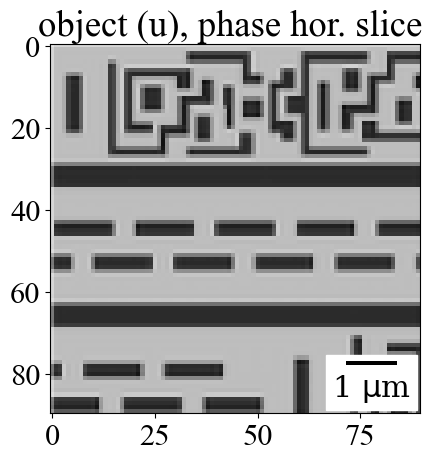

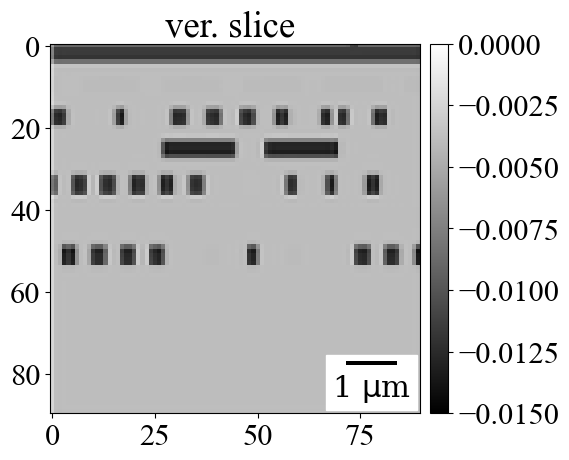

In [3]:
u0 = np.load('u.npy')
q0 = np.load('q.npy')
r0 = np.load('shifts.npy')
data = np.load('data.npy')
ref = np.load('ref.npy')


for k in range(4):
    fig,ax = plt.subplots(1)
    plt.title(f'data, distance {k+1}',fontsize=44)
    divider = make_axes_locatable(ax)
    im=ax.imshow(data[0,k].real,cmap='gray')
    scalebar = ScaleBar(voxelsize*magnifications[0], "m", length_fraction=0.25, font_properties={
                "family": "serif",
            },  # For more information, see the cell below
    location="lower right")    
    ax.add_artist(scalebar)
    # cax = divider.append_axes('right', size='5%', pad=0.1)
    # cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    # cbar.ax.tick_params(labelsize=22)
    plt.savefig(f'figs/data{k}.png',dpi=300,bbox_inches='tight')
    plt.show()


for k in range(4):
    fig,ax = plt.subplots(1)
    plt.title(f'corrected data',fontsize=44)
    divider = make_axes_locatable(ax)
    im=ax.imshow(data[0,k].real/ref[0],cmap='gray',vmax=1.8,vmin=0)#,vmax=0,vmin=-0.015)
    scalebar = ScaleBar(voxelsize*magnifications[0], "m", length_fraction=0.25, font_properties={
                "family": "serif",
            },  # For more information, see the cell below
    location="lower right")    
    ax.add_artist(scalebar)
    # cax = divider.append_axes('right', size='5%', pad=0.1)
    # cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    # cbar.ax.tick_params(labelsize=22)
    plt.savefig(f'figs/cdata{k}.png',dpi=300,bbox_inches='tight')
    plt.show()

for k in range(3):
    fig,ax = plt.subplots(1)
    divider = make_axes_locatable(ax)
    im=ax.imshow(u0[62,60:-58,60:-58].real,cmap='gray',vmax=0,vmin=-0.015)
    scalebar = ScaleBar(voxelsize, "m", length_fraction=0.25, font_properties={
                "family": "serif",
            },  # For more information, see the cell below
    location="lower right")
    plt.title('object (u), phase hor. slice ')
    ax.add_artist(scalebar)
    # cax = divider.append_axes('right', size='5%', pad=0.1)
    # cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    # cbar.ax.tick_params(labelsize=22)
    plt.savefig(f'figs{k}/uz.png',dpi=300,bbox_inches='tight')
    plt.show()
    fig,ax = plt.subplots(1)
    plt.title('ver. slice ')
    divider = make_axes_locatable(ax)
    im=ax.imshow(u0[60:-58,128,60:-58].real,cmap='gray',vmax=0,vmin=-0.015)
    scalebar = ScaleBar(voxelsize, "m", length_fraction=0.25, font_properties={
                "family": "serif",
            },  # For more information, see the cell below
    location="lower right")
    ax.add_artist(scalebar)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    cbar.ax.tick_params(labelsize=22)
    plt.savefig(f'figs{k}/ux.png',dpi=300,bbox_inches='tight')
    plt.show()

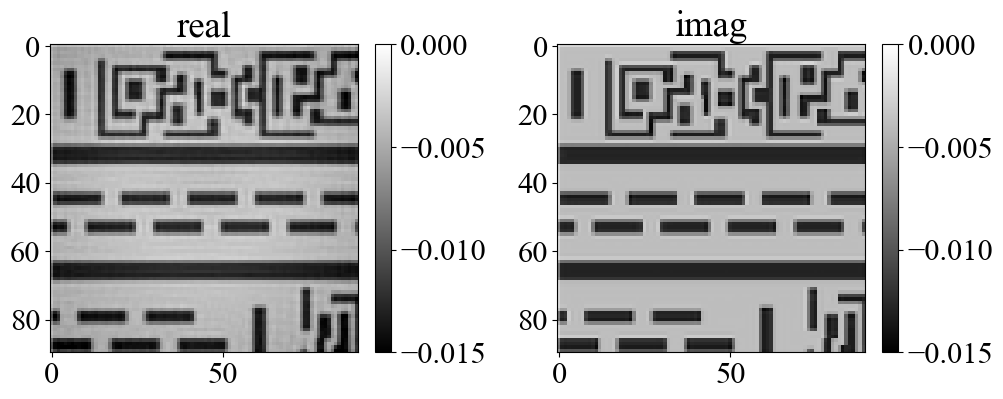

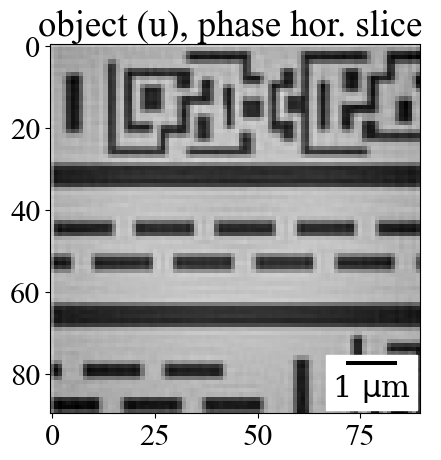

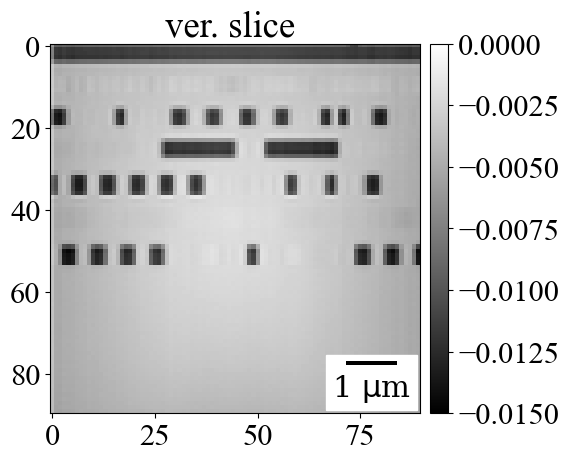

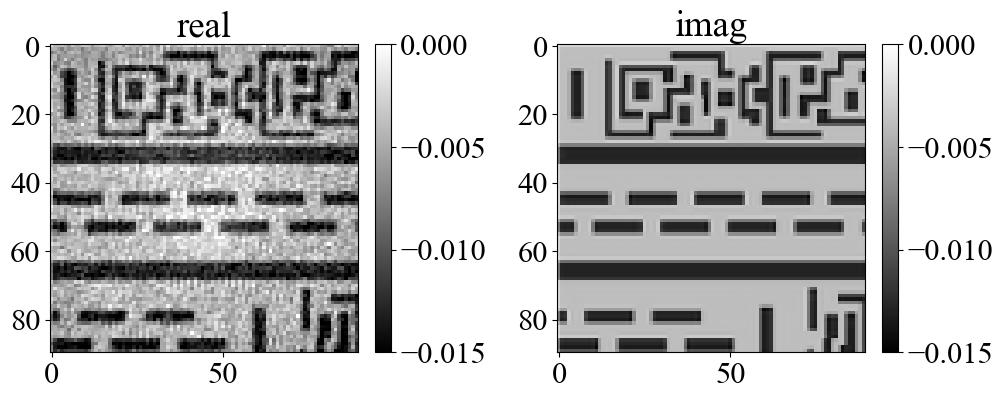

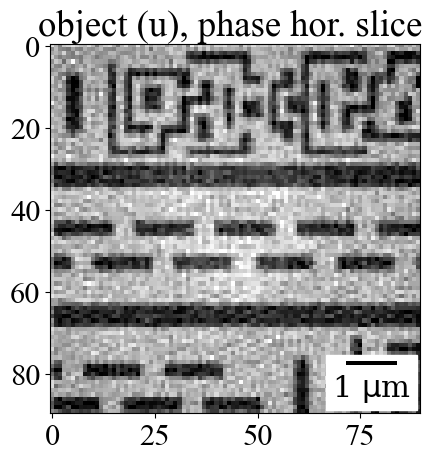

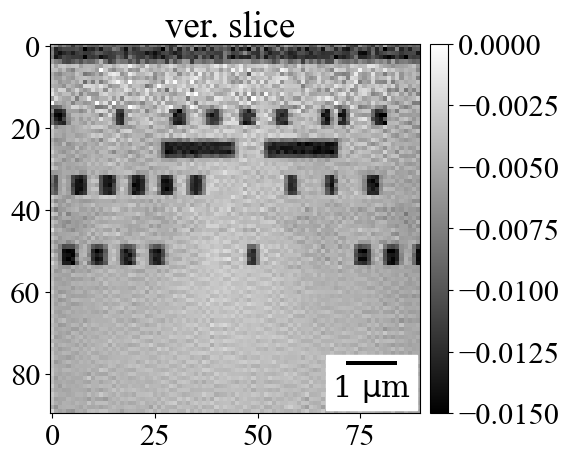

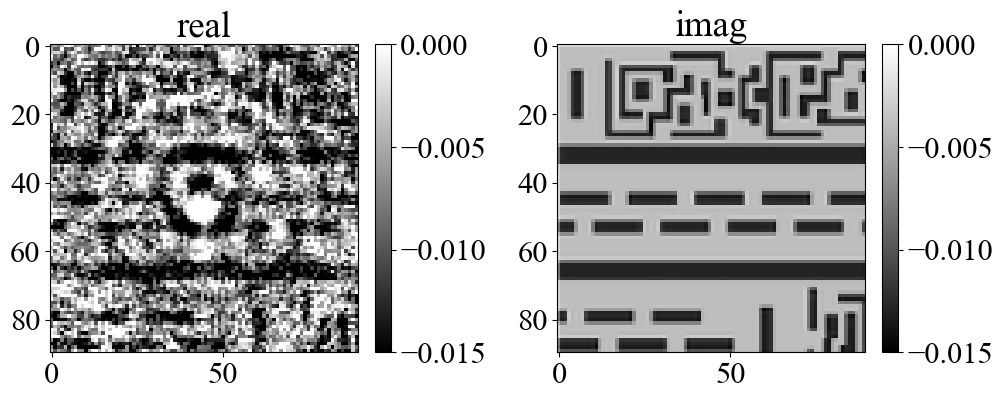

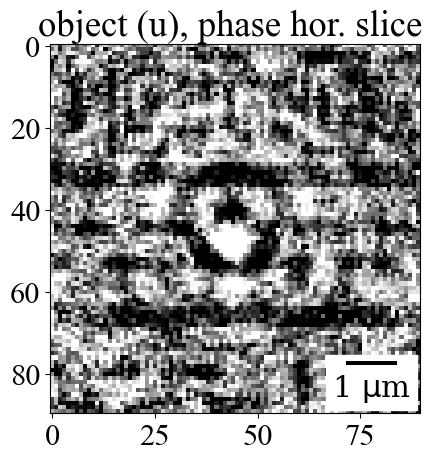

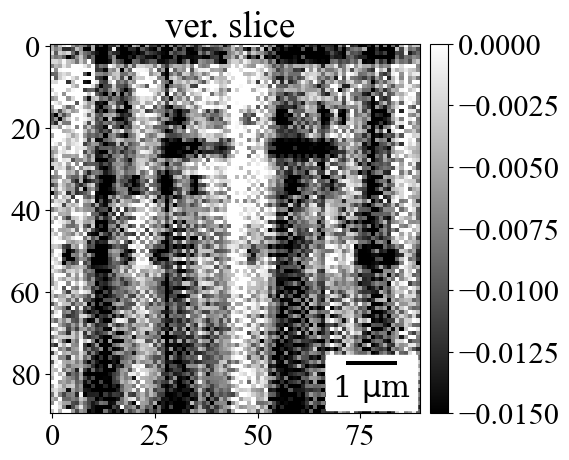

In [4]:
iter=1024
for k in range(3):
    
    urec = read_tiff(f'/local/data/out{k}/rec_u_real/{iter:04}.tiff')-0.003
    # urec[urec.real>-0.003]=0
    mshow_complex(urec[63,60:-58,60:-58]+1j*u0[63,60:-58,60:-58],True,vmax=0,vmin=-0.015)
    fig,ax = plt.subplots(1)
    plt.title('object (u), phase hor. slice ')
    divider = make_axes_locatable(ax)
    im=ax.imshow(urec[62,60:-58,60:-58],cmap='gray',vmax=0,vmin=-0.015)
    scalebar = ScaleBar(voxelsize, "m", length_fraction=0.25, font_properties={
                "family": "serif",
            },  # For more information, see the cell below
    location="lower right")
    ax.add_artist(scalebar)
    # cax = divider.append_axes('right', size='5%', pad=0.1)
    # cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    # cbar.ax.tick_params(labelsize=22)
    
    plt.savefig(f'figs{k}/urecz.png',dpi=300,bbox_inches='tight')
    plt.show()
    fig,ax = plt.subplots(1)
    plt.title('ver. slice ')
    divider = make_axes_locatable(ax)
    im=ax.imshow(urec[60:-58,128,60:-58],cmap='gray',vmax=0,vmin=-0.015)
    scalebar = ScaleBar(voxelsize, "m", length_fraction=0.25, font_properties={
                "family": "serif",
            },  # For more information, see the cell below
    location="lower right")
    ax.add_artist(scalebar)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    cbar.ax.tick_params(labelsize=22)    
    plt.savefig(f'figs{k}/urecx.png',dpi=300,bbox_inches='tight')
    plt.show()

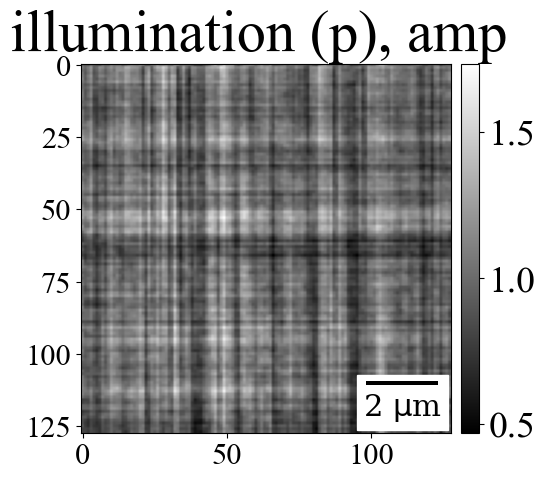

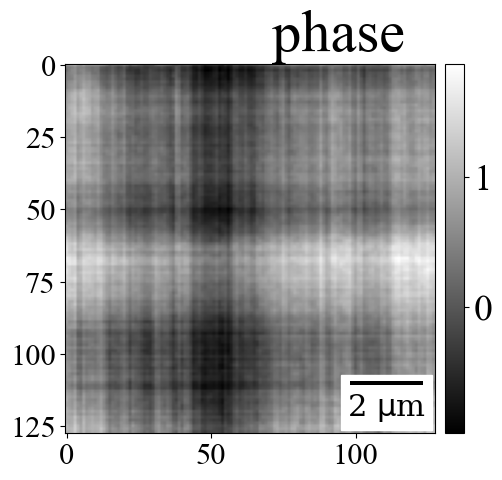

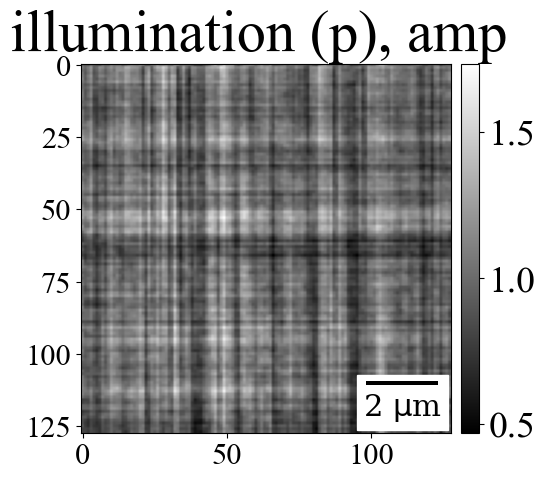

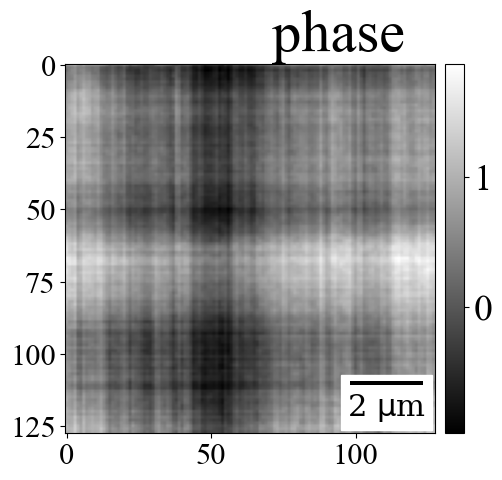

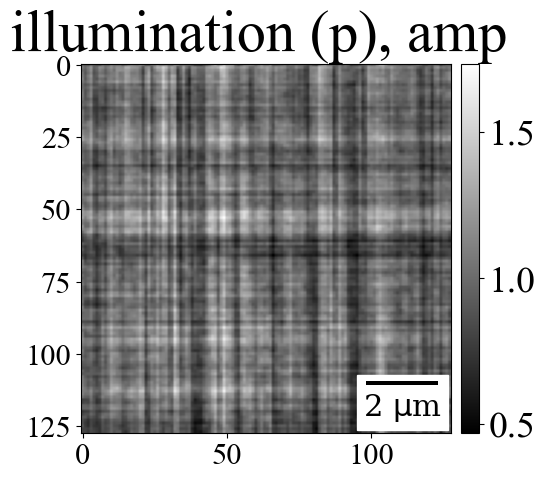

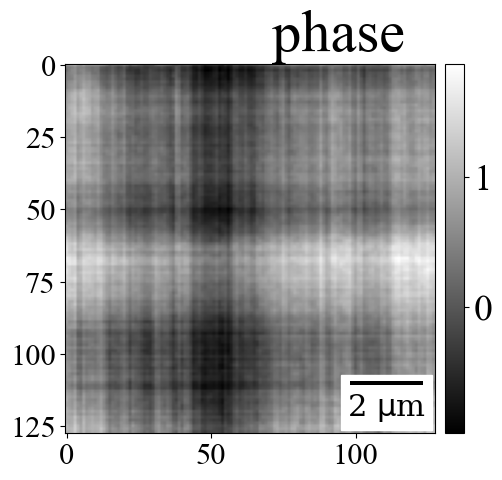

In [5]:

for k in range(3):
    q0 = np.load('q.npy')#read_tiff(f'/local/data/out0/rec_prb_abs0/{iter}.tiff')

    fig,ax = plt.subplots(1)
    plt.title('illumination (p), amp ',fontsize=42)
    divider = make_axes_locatable(ax)
    im=ax.imshow(np.abs(q0[0]),cmap='gray')#,vmax=0,vmin=-0.015)

    scalebar = ScaleBar(voxelsize, "m", length_fraction=0.25, font_properties={
                "family": "serif",
            },  # For more information, see the cell below
    location="lower right")
    ax.add_artist(scalebar)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    cbar.ax.tick_params(labelsize=27)
    plt.savefig(f'figs{k}/qabs.png',dpi=300,bbox_inches='tight')
    plt.show()

    fig,ax = plt.subplots(1)
    plt.title('             phase ',fontsize=42)
    divider = make_axes_locatable(ax)
    im=ax.imshow(np.angle(q0[0]),cmap='gray')#,vmax=0,vmin=-0.015)

    scalebar = ScaleBar(voxelsize, "m", length_fraction=0.25, font_properties={
                "family": "serif",
            },  # For more information, see the cell below
    location="lower right")
    ax.add_artist(scalebar)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    cbar.ax.tick_params(labelsize=27)
    plt.savefig(f'figs{k}/qangle.png',dpi=300,bbox_inches='tight')
    plt.show()


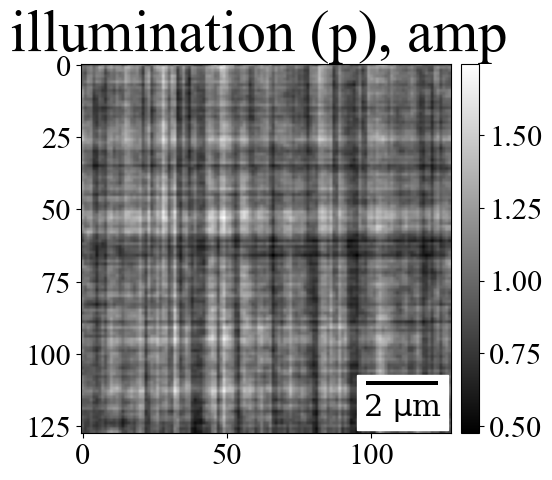

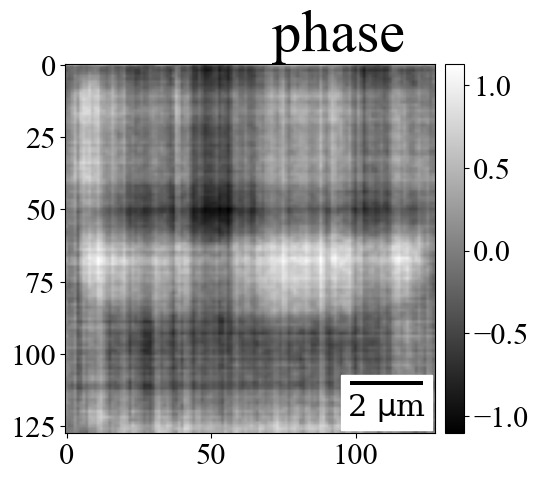

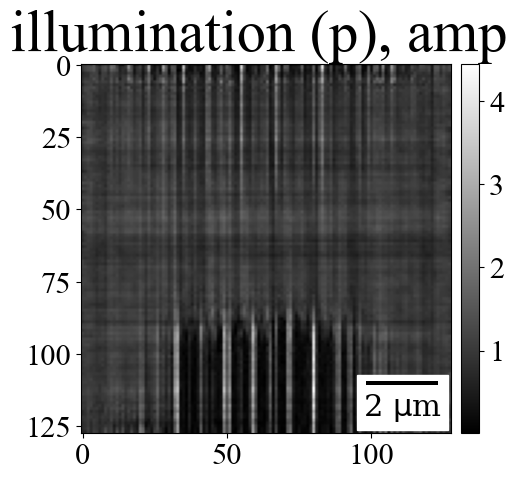

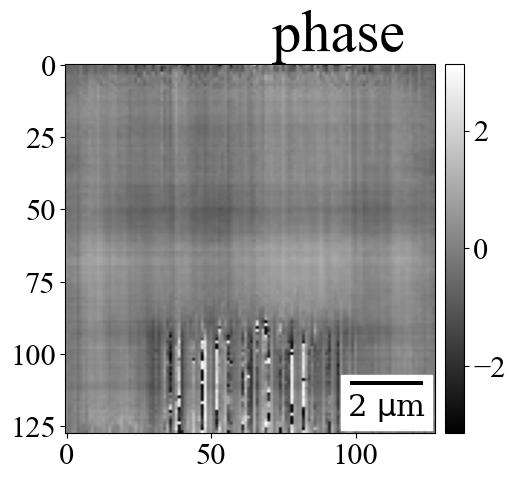

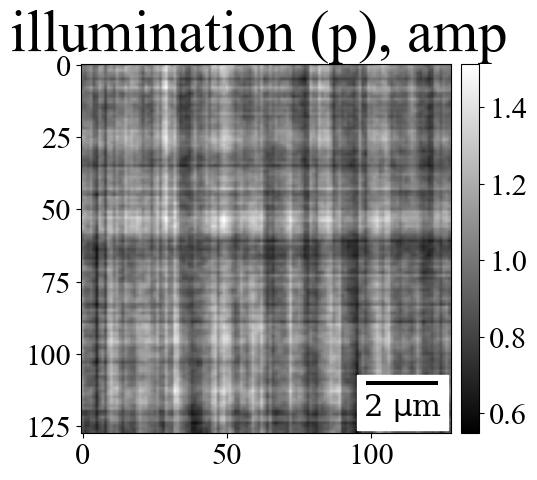

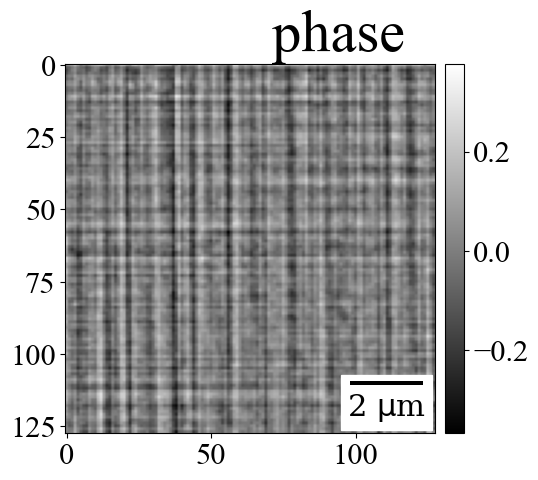

In [6]:

for k in range(3):
    qabsrec = read_tiff(f'/local/data/out{k}/rec_prb_abs0/{iter:04}.tiff')
    qanglerec = read_tiff(f'/local/data/out{k}/rec_prb_angle0/{iter:04}.tiff')
    qrec=qabsrec*np.exp(1j*qanglerec)
    fig,ax = plt.subplots(1)
    divider = make_axes_locatable(ax)
    im=ax.imshow(np.abs(qrec),cmap='gray')#,vmax=0,vmin=-0.015)
    plt.title('illumination (p), amp ',fontsize=42)
    scalebar = ScaleBar(voxelsize, "m", length_fraction=0.25, font_properties={
                "family": "serif",
            },  # For more information, see the cell below
    location="lower right")
    ax.add_artist(scalebar)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    cbar.ax.tick_params(labelsize=22)
    plt.savefig(f'figs{k}/qrecabs.png',dpi=300,bbox_inches='tight')
    plt.show()

    fig,ax = plt.subplots(1)
    plt.title('             phase ',fontsize=42)
    divider = make_axes_locatable(ax)
    im=ax.imshow(np.angle(qrec),cmap='gray')#,vmax=0,vmin=-0.015)

    scalebar = ScaleBar(voxelsize, "m", length_fraction=0.25, font_properties={
                "family": "serif",
            },  # For more information, see the cell below
    location="lower right")
    ax.add_artist(scalebar)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    cbar.ax.tick_params(labelsize=22)
    plt.savefig(f'figs{k}/qrecangle.png',dpi=300,bbox_inches='tight')
    plt.show()


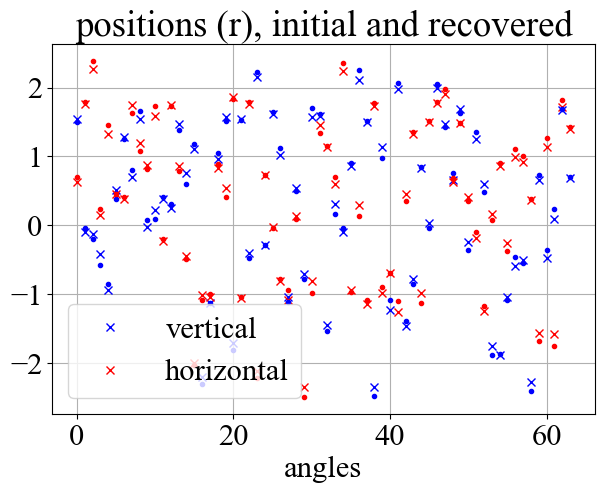

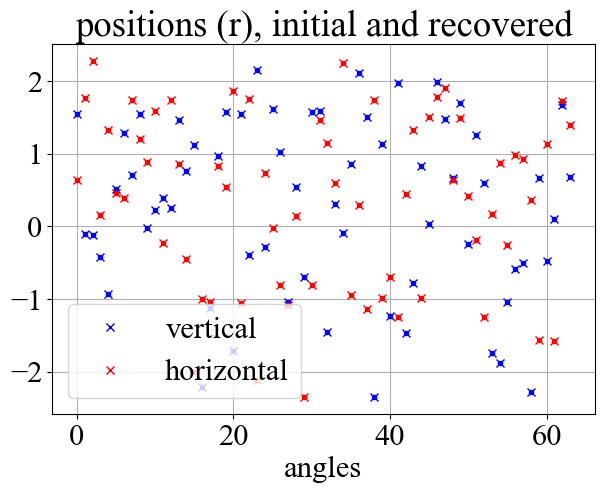

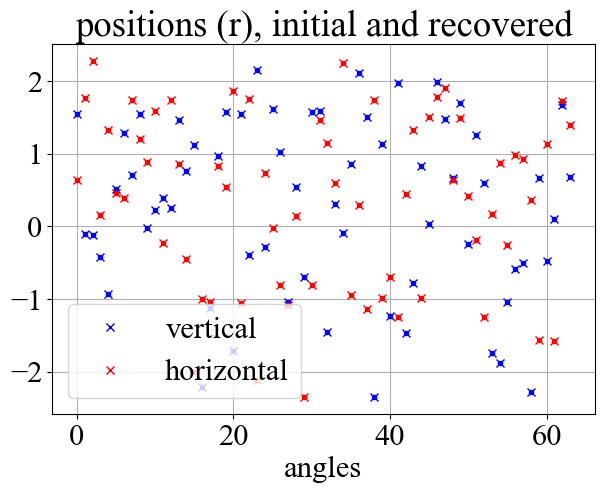

In [7]:
for k in range(3):
    fig = plt.figure(figsize=(7,4.8))
    r = np.load(f'shifts.npy')
    rerr = np.load(f'shifts_err.npy')
    plt.title('positions (r), initial and recovered')
    plt.plot(r[::2,0,0],'x',fillstyle='none',label='vertical',color='blue')
    plt.plot(r[::2,0,1],'x',fillstyle='none',label='horizontal',color='red')
    # plt.plot(r[:,0,1],'x',fillstyle='none',label='intial positions x')
    r_rec = np.load(f'/local/data/out{k}/r{iter:04}.npy')
    plt.plot(r_rec[::2,0,0],'.',color='blue')
    plt.plot(r_rec[::2,0,1],'.',color='red')
    plt.xlabel('angles')
    # plt.ylabel('shifts')
    plt.grid()
    plt.legend()
    plt.savefig(f'figs{k}/rec_positions.png',dpi=300,bbox_inches='tight')
    plt.show()
    

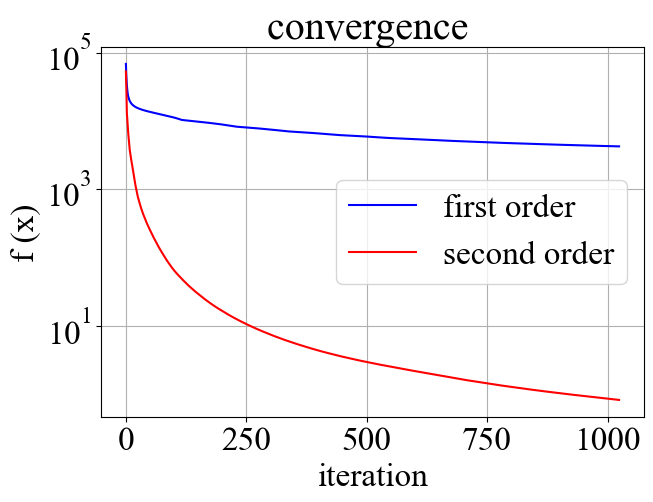

In [25]:
import pandas as pd
font = {'family' : 'Times New Roman', 'size'   : 24}
matplotlib.rc('font', **font)
fig = plt.figure(figsize=(7,4.8))

plt.title('convergence ')
df = pd.read_csv(csv_file_path)
# plt.plot(df['err'],label='optimization: u, p')
csv_file_path = '/local/data/out00/conv.csv'
df = pd.read_csv(csv_file_path)

plt.plot(df['err'],label='first order',color='blue')
# Define the path to your CSV file
csv_file_path = '/local/data/out0/conv.csv'
df = pd.read_csv(csv_file_path)
plt.plot(df['err'],label='second order',color='red')
csv_file_path = '/local/data/out1/conv.csv'

plt.xlabel('iteration')
plt.ylabel('f (x)')
plt.yscale('log')
plt.legend(loc='center right')
plt.grid()

plt.savefig('figs/conv.png',dpi=300,bbox_inches='tight')